## Using Self Organizing Maps to predict fraud on Credit Cards

Importing the basic libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the Data set

In [21]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [22]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Feature Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

Training the Self Organizing Map

In [24]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

Visualizing the Results

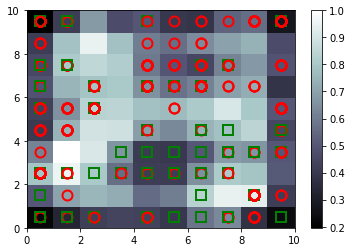

In [25]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

The red circles correspond to the users who didnt get approval(fraud) and the gree squares are the ones with appropriate approvals.

Finding the Frauds

In [26]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [32]:
frauds.shape[0]

25

This implies there are 25 fraud cases as detected by the Self Organizing Map